<a href="https://colab.research.google.com/github/WEN0009/ADS2001/blob/main/StockPortfolioOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stock Portfolio Optimization

Import libraries.

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

We'll first do some EDA on the stock prices. Upload stocks in the S&P500 and change the date to something easier to use.

In [ ]:
#Importing and formatting the df
stocks = pd.read_csv('Data_adjprice.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'], format='%Y%m%d')
stocks

,Date,0111145D US Equity,0202445Q US Equity,0203524D US Equity,0226226D US Equity,0376152D US Equity,0440296D US Equity,0544749D US Equity,0574018D US Equity,0598884D US Equity,...,YNR US Equity,YRCW US Equity,YUM US Equity,YUMC US Equity,ZBH US Equity,ZETHQ US Equity,ZION US Equity,ZRN US Equity,ZTS US Equity,ZTS-W US Equity
0,1993-09-07,13.2719,13.6829,8.4429,8.1042,11.000,57.3245,17.8887,6.8315,28.1246,...,NaN,144439.5121,NaN,NaN,NaN,6.875,7.1675,30.7970,NaN,NaN
1,1993-09-08,13.3263,13.5315,8.2147,7.9590,11.000,57.2096,17.8064,6.8315,27.5051,...,NaN,143691.1208,NaN,NaN,NaN,6.750,6.9766,30.0188,NaN,NaN
2,1993-09-09,13.7070,13.3800,8.7852,8.0627,11.125,59.1625,17.6831,6.8315,27.7529,...,NaN,143691.1208,NaN,NaN,NaN,6.625,6.9554,30.0188,NaN,NaN
3,1993-09-10,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
4,1993-09-11,13.3807,13.4810,9.4127,8.0368,11.125,59.6220,17.6420,6.8773,27.5051,...,NaN,145187.9033,NaN,NaN,NaN,6.750,7.2099,29.6852,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2019-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9455,2019-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.3500,114.02,45.31,134.50,NaN,45.1600,NaN,115.11,NaN
9456,2019-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,114.10,45.43,134.53,NaN,44.6500,NaN,115.55,NaN
9457,2019-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.1800,113.24,44.00,136.67,NaN,45.4800,NaN,115.79,NaN


Investigate the preformance of the stocks of the period from StartDate to EndDate

In [ ]:
StartDate = "2017/01/01"
EndDate = "2017/12/31"

Drop the rows in stocks outside this period and copy this to stocks_short. Also drop any columns with NaN, as these columns will not be in the S&P 500 during this period.

In [ ]:
stocks_short = stocks[(stocks["Date"] >= StartDate) & (stocks["Date"] <= EndDate)]
stocks_short.dropna(axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Store the columns names, and calculate the return as (FinalPrice-StartPrice)/StartPrice, and the volatility as StandardDeviation/StartPrice. The Sharpe Ratio (should have some no risk return to compare this against) then gives an indication of the performance of the stock over the period of interest.

In [ ]:
stocks = stocks_short.columns[1:] # column 0 has the date, so drop that
stocks_return = stocks_short.iloc[-1,1:]/stocks_short.iloc[0,1:]-1 # last/first-1
# calcuate standard variation of time series and divide by first price
stocks_var = stocks_short.std()/stocks_short.iloc[0,1:]
sharpe_ratio = stocks_return/stocks_var # return divided by variance

Plot Volatility vs Return and a reference line to give an indication of the best performing stocks. Best performing stocks are in contact with line through the origin with largest slope.

(-1, 4)

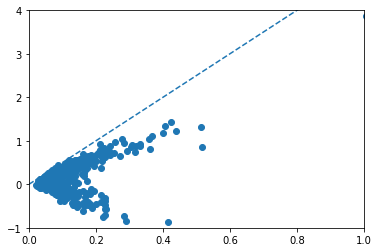

In [ ]:
plt.scatter(stocks_var,stocks_return)
plt.plot([0,1],[0,5],ls='--') # reference line of return = 5*std
plt.xlim([.0,1])
plt.ylim([-1,4])

Plot histograms of the Return, Volatility and Sharpe Ratio. The majority of stocks have a Sharpe Ratio > 2, which is indicative of good performance.

Text(0.5, 1.0, 'Sharpe Ratio')

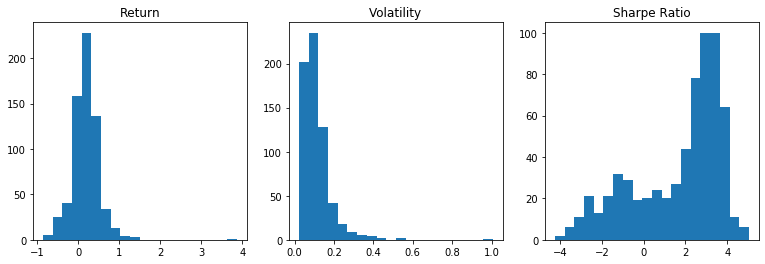

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(13,4))
axs[0].hist(stocks_return,20); # but the data in 20 bins
axs[0].set_title('Return')
axs[1].hist(stocks_var,20);
axs[1].set_title('Volatility')
axs[2].hist(sharpe_ratio,20);
axs[2].set_title('Sharpe Ratio')

Sort by performance and print the top 20 performing stocks.

In [ ]:
sharpe_ratio_sorted = pd.Series.sort_values(sharpe_ratio,ascending=False)
sharpe_ratio_sorted.head(20)

LM US Equity       5.03868
LOW US Equity      4.86345
TIF US Equity      4.84359
CLX US Equity       4.6809
CSX US Equity      4.67144
EMR US Equity      4.67125
ILMN US Equity     4.34467
AA US Equity       4.31361
ARNC US Equity     4.27726
HD US Equity       4.26749
TKR US Equity      4.26205
NSC US Equity      4.23398
RSG US Equity      4.19532
LEN US Equity      4.19324
PH US Equity       4.16001
NWS US Equity      4.12101
MAS US Equity      4.11629
LEN/B US Equity    4.09617
UNP US Equity      4.09445
DRI US Equity      4.02907
dtype: object

Create a random portfolio of NSTOCKS stocks, which all have positive return for the period of interest.

In [ ]:
NSTOCKS = 20
# drop all the stocks with negative return and take a random sample of the remainder
stocks_return = stocks_return[stocks_return > 0].sample(n=NSTOCKS)

Copy the stock timeseries for each stock in the portfolio into a new dataframe.

In [ ]:
 # create a new dataframe with the first column being the dates
portfolio = pd.DataFrame(stocks_short['Date'],columns=['Date'])
for col in stocks_short.columns: # go through all the columns in our original data frame
    if col in stocks_return.index: # check if this column is in the names for our random sample
        portfolio = pd.concat([portfolio,stocks_short[col]],axis=1) # if so, add the stock prices to the new dataframe

Calculate and plot the correlation of the returns in the portfolio. This is important as we need a diversified portfolio, so the stocks in the portfolio should have weak correlation.

(20.0, 0.0)

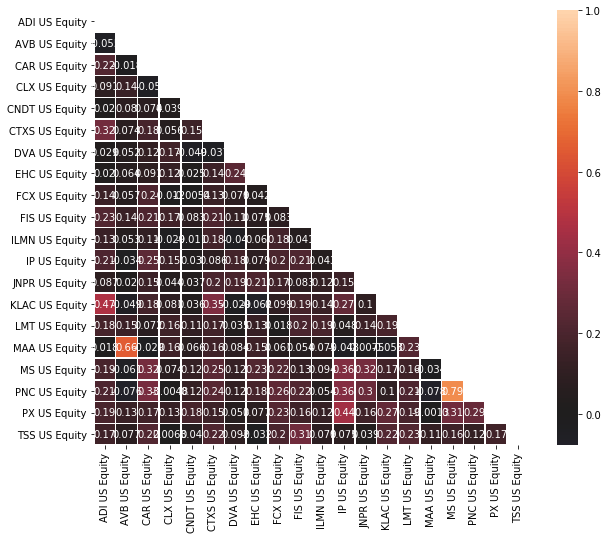

In [ ]:
# diff calculates the daily return, then we calculate the correlation between variables
corrs = portfolio.diff(axis=0, periods=1).corr()
mask = np.triu(np.ones_like(corrs, dtype=np.bool)) # create a mask to only show entries below the main diagonal
f, ax = plt.subplots(figsize=(10, 8))
# plot the heatmap with a colour bar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5)
# adjust the top and bottom, so that we can see the whole figure
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Get an idea of the risk and return for the portfolio by randomly calculating the stock weights, and then calculate the risk and return for the portfolio and then plotting these. From [Modern Portfolio Theory on Wikipedia](https://en.wikipedia.org/wiki/Modern_portfolio_theory), the variance of the portfolio is defined as

$$ \sigma_p^2 = w^T \times Corr \times w, $$

where $w$ is the vector of the weights and $Corr$ is the correlation matrix for the portfolio. The risk is then

$$ \sigma_p = (\sigma_p^2)^{1/2}. $$

The return is defined as (FinalValue-StartValue)/StartValue. We normalize the weights so that StartValue=1, and thefore the return is FinalValue-1.

Text(0, 0.5, 'Return')

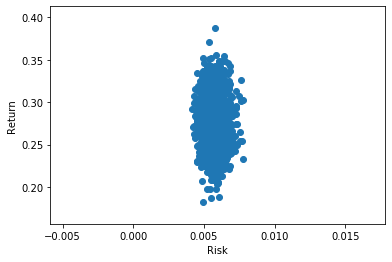

In [ ]:
NSAMP = 2000 # set the number of random samples of the weights
result_array = np.zeros((2, NSAMP)) # create a numpy array to store the returns and risk for each sample
Ro = portfolio.iloc[0,1:] # store the initial stock prices
R = portfolio.iloc[-1,1:] # store the final stock prices
for i in range(NSAMP): # loop over all the samples
    w = np.random.rand(NSTOCKS) # generates weights in the range [0,1] for all the stockes
    # calculate the initial value of the stock portfolio, @ => multiply two matrices, .T => transpose of matrix
    Po = w.T @ Ro
    w = w/Po # normalize random numbers so that portfolio has an initial value of 1
    Pf = w.T @ R # calculate final value of portfolio
    risk = np.sqrt(w.T @ corrs @ w) # use the formula above to calculate the risk
    result_array[:,i] = [risk,Pf-1] # store risk and return
# plot risk vs returns and add axis labels
plt.scatter(result_array[0,:],result_array[1,:])
plt.xlabel('Risk')
plt.ylabel('Return')

To calculate the optimal portfolio we use the function `minimize` from `scipy.optimize`, which mimimizes a function of multiple variables subject to constraints and bounding conditions. In this case the independent variables are the portfolio weights, represented by w, the constraint is that the initial value of the portfolio is 1 and the bounds are that all the weight are positive. The function that we want to mimimize, is given a risk factor Q: minimize Variance - Q * Return. Note that the risk factor is different from the final risk. The final risk can then be plotted against the final return and compared against the values using random generation of the weights.

(0.0, 1.0)

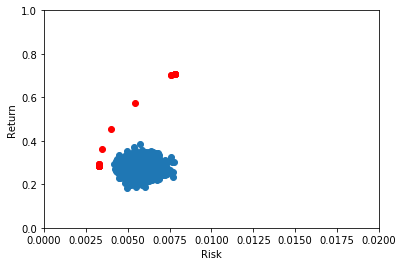

In [ ]:
# plot risk vs return again, so that we can overlay optimal portfolio values
plt.scatter(result_array[0,:],result_array[1,:])
plt.xlabel('Risk')
plt.ylabel('Return')

# Ro = portfolio.iloc[0,1:]
# R = portfolio.iloc[-1,1:]
w = np.random.rand(NSTOCKS) # generate a random sample of weights to be used as an initial guess
w = w/np.dot(Ro,w) # normalize these weights so that initial portfolio value is 1
# loop over values of the risk measure logarithmically distributed from 10^{-8} to 0.1
for Q in np.logspace(-8,-1,21):
    # define using lambda function the function to minimize: Variance-Q*Return
    portfolio_optimization = lambda w: w.T @ corrs @ w - Q*( w.T @ R )
    # define using lambda function the constraint that the initial value of the portfolio =1
    # the argument passed to minimize has to be a dict, where the 'type' field defines whether it is
    # and equality ('eq') or inequality ('ineq') and the 'fun' field defines the function,
    # since we have equality, this gives w.T @ Ro - 1 = 0 => w.T @ Ro = 1
    portfolio_constraint = ({'type': 'eq', 'fun': lambda w: (w.T @ Ro)-1})
    # bounds is a (NSTOCKS,2) array which provides bounds of the variables
    # here we want all the weights to be positive, so the lower bound is 0 and the upper bound is None
    # np.tile repeats the first argument as specified by the second argument, here repeat the array
    # NSTOCKS time
    portfolio_bounds = np.tile((0,None),(NSTOCKS,1))
    # call the scipy function minimize with the first argument being the function to minimize and the second
    # argument being an initial guess,
    # after the first step in the loop we use the last value of w as our initial guess,
    # as this is already normalized
    # in the second and third lines we specify the variable bounds and constraints
    x = minimize(portfolio_optimization, w,
                             bounds=portfolio_bounds,
                             constraints=portfolio_constraint)
    # the values of the weights are stored in the x field, so we store these
    w = x.x
    # plot the risk and return with red circles
    plt.plot(np.sqrt(w.T @ corrs @ w),np.dot(R,w)-1,'o',color='r')
# set axis limits
plt.xlim([0,.02])
plt.ylim([.0,1.])